In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import random
import numpy as np

import math

In [6]:
# def functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
# read data
train = pd.read_csv("C:/Users/akabo/Downloads/Machine learning/final project/Project Data/Project Data/ProjectTrainingData.csv")
test = pd.read_csv("C:/Users/akabo/Downloads/Machine learning/final project/Project Data/Project Data/ProjectTestData.csv")

In [10]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [11]:
print(min(test.hour))
print(max(test.hour))

14102100
14103123


In [13]:
print(train.shape)
print(test.shape)

(31991090, 24)
(13015341, 23)


# 1 1000000 Sample

In [369]:
# take 1000000 samples
sample = train.sample(1000000, random_state = 613)

print(sample.click.value_counts())
print(len(sample[sample.click == 1])/len(sample)) # 17%

# get date of sample
sample['date'] = round((sample.hour - 14100000)/100).astype('int')

# get hour of sample
sample.hour = sample.hour - 14100000 - sample.date * 100

print(sample.columns) # can treat hour and date as continuous variables, but now let's just make it categorical

for i in range(2, 25):
        sample.iloc[:, i] = sample.iloc[:, i].astype('category') # change to categorical variables
sample = sample.iloc[:, 1:] # delete id

for cat_var in sample.columns:
    print(cat_var, sample[cat_var].nunique())

print(sample.columns[[10, 11]])

sample.drop(['device_id', 'device_ip'], axis = 1, inplace = True) # so many categories, drop these two variables for now

0    829194
1    170806
Name: click, dtype: int64
0.170806
Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date'],
      dtype='object')
click 2
hour 24
C1 7
banner_pos 7
site_id 2647
site_domain 2888
site_category 23
app_id 3184
app_domain 194
app_category 26
device_id 151890
device_ip 546929
device_model 5156
device_type 4
device_conn_type 4
C14 2114
C15 8
C16 9
C17 396
C18 4
C19 65
C20 162
C21 55
date 9
Index(['device_id', 'device_ip'], dtype='object')


In [252]:
# not sure need to be the same or not?
# for i in range(0,23):
#     X_test = X_test[X_test[X_test.columns[i]].isin(X_train.iloc[:,i])]

# len(X_test)
# y_test = y_test[X_test.index]

In [370]:
from sklearn.model_selection import train_test_split

# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    sample.iloc[:, 1:], sample['click'], test_size = 0.4, random_state = 613, stratify = sample['click'])

In [373]:
from sklearn import preprocessing
X_train_ordinal = X_train.values
X_test_ordinal = X_test.values
les = []

for i in range(X_train_ordinal.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(sample.iloc[:,1:].iloc[:, i])
    les.append(le)
    X_train_ordinal[:, i] = le.transform(X_train_ordinal[:, i])
    X_test_ordinal[:, i] = le.transform(X_test_ordinal[:, i])

## 1.1 Tree

## 1.2 Random Forest

In [402]:
# give up
# Tuning n_estimators

n_estimators = range(100, 500, 100)
test_results = []
accuracy = []

for n_estimator in n_estimators:
    clf_n_estimator = RandomForestClassifier(n_estimators = n_estimator, max_features = 0.3)
    clf_n_estimator.fit(X_train_ordinal, y_train)
    
    n_estimator_pred = clf_n_estimator.predict_proba(X_test_ordinal)
    y_pred = clf_n_estimator.predict(X_test_ordinal)

    score_log_loss = log_loss(y_test, n_estimator_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)
    
print(n_estimators[test_results.index(min(test_results))])

KeyboardInterrupt: 

In [391]:
# Tuning max_depth

max_depths = range(10, 50, 10)
test_results = []
accuracy = []

for max_depth in max_depths:
    clf_max_depth = RandomForestClassifier(n_estimators = 25, max_depth = max_depth, max_features = 0.3)
    clf_max_depth.fit(X_train_ordinal, y_train)
    
    max_depth_pred = clf_max_depth.predict_proba(X_test_ordinal)
    y_pred = clf_max_depth.predict(X_test_ordinal)

    score_log_loss = log_loss(y_test, max_depth_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)
    
print(max_depths[test_results.index(min(test_results))])

20


In [410]:
# Tuning min_samples_split

min_samples_splits = range(50, 250, 50)
test_results = []
accuracy = []

for min_samples_split in min_samples_splits:
    clf_min_samples_split = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = min_samples_split, max_features = 0.3)
    clf_min_samples_split.fit(X_train_ordinal, y_train)
    
    min_samples_split_pred = clf_min_samples_split.predict_proba(X_test_ordinal)
    y_pred = clf_min_samples_split.predict(X_test_ordinal)

    score_log_loss = log_loss(y_test, min_samples_split_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)
    
print(min_samples_splits[test_results.index(min(test_results))])

150


In [411]:
test_results

[0.4016607630928469,
 0.4017132004443949,
 0.4014190299108201,
 0.40185027295894327]

RF feature importance:  [(0.1201, 'site_id'), (0.0889, 'site_domain'), (0.0821, 'C16'), (0.0813, 'C21'), (0.0809, 'device_model'), (0.079, 'C14'), (0.0516, 'hour'), (0.0509, 'site_category'), (0.044, 'C17'), (0.0409, 'C20'), (0.0395, 'app_id'), (0.0372, 'C15'), (0.0369, 'app_category'), (0.034, 'C19'), (0.0306, 'date'), (0.026, 'app_domain'), (0.0218, 'C18'), (0.0178, 'banner_pos'), (0.0131, 'device_conn_type'), (0.0127, 'C1'), (0.0108, 'device_type')]
Confusion matrix, without normalization
[[328452   3226]
 [ 63269   5053]]
Normalized confusion matrix
[[0.99 0.01]
 [0.93 0.07]]


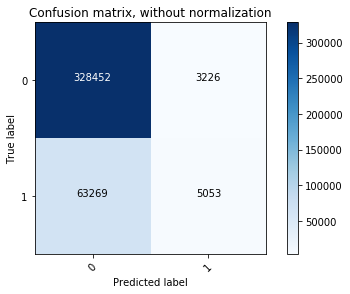

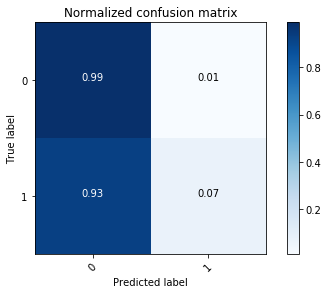

Accuracy (out-of-sample): 0.83
F1 score (out-of-sample):  0.5200050829783408
Kappa score (out-of-sample):  0.09865166760073452
Classification report:                precision    recall  f1-score   support

           0       0.84      0.99      0.91    331678
           1       0.61      0.07      0.13     68322

   micro avg       0.83      0.83      0.83    400000
   macro avg       0.72      0.53      0.52    400000
weighted avg       0.80      0.83      0.78    400000

AUC:  0.5321161534796359
Log loss:  0.40143854753697006


In [412]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(max_depth = 20, n_estimators = 25, min_samples_split = 150, max_features=0.3)

np.random.seed(613)
randomForest.fit(X_train_ordinal, y_train)

# Feature Importance
names = sample.columns[1:]
print('RF feature importance: ', sorted(zip(map(lambda x: round(x, 4), randomForest.feature_importances_), names), 
             reverse=True))

y_pred = randomForest.predict(X_test_ordinal)
y_pred_prob = randomForest.predict_proba(X_test_ordinal)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))

# Build a text report showing the main classification metrics (out-of-sample performance)
print('Classification report: ',classification_report(y_test, y_pred, target_names=['0', '1']))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc)

print('Log loss: ', log_loss(y_test, y_pred_prob))